In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing csv file

In [2]:
filepath="train.csv"
data=pd.read_csv(filepath,index_col=0)
data2=pd.read_csv(filepath,index_col=0)

## Exploratory Data Analysis

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

[]

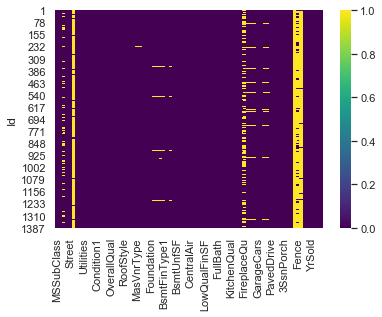

In [5]:
#Have a feel of the missing values with a heat map
sns.heatmap(data.isnull(),cmap="viridis")
plt.plot()

## Addressing Missing Values

In [6]:
# imputing missing values for lotfrontage to be 0 as from the dataset a majority of observations has 0 lotfrontage
data["LotFrontage"]=data["LotFrontage"].fillna(0)

In [7]:
# drop whole of Alley column as there are less than 10% of values available
data.drop("Alley",axis="columns",inplace=True)

In [8]:
# imputing missing values for MasVnrType to be the mode = None
data["MasVnrType"].fillna(data["MasVnrType"].mode()[0],inplace=True)

In [9]:
#imputing missing values for MasVnrType to be 
data["MasVnrType"].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [10]:
#imputing missing values for MasVnrArea to be 0 which is the median and the mode
data["MasVnrArea"].fillna(data["MasVnrArea"].mode()[0],inplace=True)

In [11]:
#imputing missing values for BsmtQual with mode
data["BsmtQual"].fillna(data["BsmtQual"].mode()[0],inplace=True)

In [12]:
#imputing missing values for BsmtCond with mode
data["BsmtCond"].fillna(data["BsmtCond"].mode()[0],inplace=True)

In [13]:
#imputing missing values for BsmtExposure with mode
data["BsmtExposure"].fillna(data["BsmtExposure"].mode()[0],inplace=True)

In [14]:
#imputing missing values for BsmtFinType1 with mode
data["BsmtFinType1"].fillna(data["BsmtFinType1"].mode()[0],inplace=True)

In [15]:
#imputing missing values for BsmtFinType2 with mode
data["BsmtFinType2"].fillna(data["BsmtFinType2"].mode()[0],inplace=True)

In [16]:
#imputing missing values for Electrical with mode
data["Electrical"].fillna(data["Electrical"].mode()[0],inplace=True)

In [17]:
#drop FireplaceQu as around 50% of data missing.
data.drop("FireplaceQu",axis="columns",inplace=True)

In [18]:
#For the garage related features there are 81 missing values which tally with 81 observations without a built in garage
#for GarageType combining the other types together into a new type "Others" and imputing missing values for GarageType with "Others"
data["GarageType"]=data["GarageType"].map({"Attchd":"Attchd","Detchd":"Detchd","BuiltIn":"Others","Basment":"Others","CarPort":"Others","2Types":"Others"})
data["GarageType"].fillna("Others",inplace=True)

In [19]:
#for GarageFinish imputing missing values for GarageFinish with mode
data["GarageFinish"].fillna(data["GarageFinish"].mode()[0],inplace=True)

In [20]:
#for GarageQual combining the other types together into a new type "Others" and imputing missing values for GarageQual with "Others"
data["GarageQual"]=data["GarageQual"].map({"TA":"TA","Fa":"Others","Gd":"Others","Po":"Others","Ex":"Others"})
data["GarageQual"].fillna("Others",inplace=True)

In [21]:
#for GarageCond combining the other types together into a new type "Others" and imputing missing values for GarageCond with "Others"
data["GarageCond"]=data["GarageCond"].map({"TA":"TA","Fa":"Others","Gd":"Others","Po":"Others","Ex":"Others"})
data["GarageCond"].fillna("Others",inplace=True)

In [22]:
#For garage yrblt impute the median year
data["GarageYrBlt"].fillna(data["GarageYrBlt"].median(),inplace=True)

In [23]:
# drop PoolQC,Fence and MiscFeature since too many values are missing
data.drop(["PoolQC","Fence","MiscFeature"],axis="columns",inplace=True)

[]

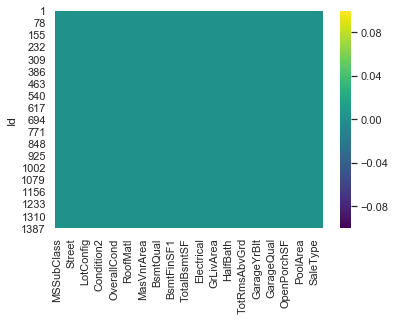

In [24]:
#Double check missing values with a heat map
sns.heatmap(data.isnull(),cmap="viridis")
plt.plot()

In [25]:
data_cleaned=data.copy()

In [26]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

## Feature preprocessing

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error as MSE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.feature_selection import RFE
import xgboost as xgb

In [28]:
data_cleaned.shape

(1460, 75)

In [39]:
test_data=pd.read_csv("test.csv",index_col=0)

In [40]:
test_data.shape

(1459, 79)

In [41]:
#drop columns from test_data like in the data cleaning step
test_data.drop(["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [42]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [43]:
combined_data=pd.concat([data_cleaned,test_data],axis=0,sort=False)

In [44]:
combined_data.shape

(2919, 75)

In [46]:
X=combined_data.drop("SalePrice",axis=1)

In [47]:
def onehot_all_cat(columns,df):
    df_final=df.copy()
    for col in columns:
        df1=pd.get_dummies(df[col],prefix=col,drop_first=True)
        df_final=pd.concat([df_final,df1],axis=1)
        df_final.drop(col,axis=1,inplace=True)
        
    return df_final

In [48]:
# group num and cat features
mask= (X.dtypes=="O")
cat_features=(X.loc[:,mask].columns).tolist()
num_features=(X.loc[:,~mask].columns).tolist()

In [49]:
data_ohe=onehot_all_cat(cat_features,X)

In [54]:
data_ohe.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [83]:
X=data_ohe.iloc[:1460,:-1]
y=combined_data.loc[:1460,"SalePrice"]

In [71]:
test=data_ohe.iloc[1460:,:-1]

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

## Linear Regression

In [87]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
rmse_lr=MSE(y_test,y_pred_lr)**0.5
print(rmse_lr)

75996.75937971586


## Lasso

In [88]:
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)
rmse_lasso=MSE(y_test,y_pred_lasso)**0.5
print(rmse_lasso)

74475.51975619144


E:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4632855759.730835, tolerance: 741730303.5120281
  positive)


## Random Forest

In [89]:
rf=RandomForestRegressor(n_estimators=100,random_state=24)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rmse_rf=MSE(y_test,y_pred_rf)**0.5
print(rmse_rf)

24986.400794429726


## XGBoost

In [90]:
regressor=xgb.XGBRegressor()

In [91]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [92]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_squared_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [93]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  6.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [94]:
y_pred_xgb=random_cv.best_estimator_.predict(X_test)
rmse_xgb=MSE(y_test,y_pred_xgb)**0.5
print(rmse_xgb)

23162.498099004486


In [96]:
y_pred_test_data=random_cv.best_estimator_.predict(test)

In [98]:
test.reset_index(inplace=True)

In [107]:
y_pred_test_data

array([118709.125, 156262.3  , 185255.95 , ..., 184228.86 , 125588.78 ,
       229729.72 ], dtype=float32)

In [109]:
submission=pd.DataFrame(y_pred_test_data)

In [111]:
submission["Id"]=np.arange(1461,2920)

In [113]:
submission.columns=["SalePrice","Id"]

In [114]:
reordered=["Id","SalePrice"]

In [115]:
submission=submission[reordered]

In [118]:
submission.to_csv("submission_xgb.csv",index=False)